In [1]:
import pandas as pd
import numpy as np

In [54]:
df = np.random.randint(0,10,size=(1000, 2))

In [58]:
from sklearn.model_selection import train_test_split

train_df,test_df = train_test_split(df,test_size = 0.20)

In [87]:
class LinearRegression:
    def calculate_Slope_intercept(self,x_values,y_values):
        ss_xy = 0
        ss_xx = 0
        for i in range(len(x_values)):
            ss_xy += (x_values[i] - np.mean(x_values))*(y_values[i] - np.mean(y_values))
            ss_xx += (x_values[i] - np.mean(x_values))**2
        self.slope = ss_xy/ss_xx
        self.intercept = np.mean(y_values) - self.slope*np.mean(x_values)

        return slope,intercept
    
    def error_term(self,x_values,y_values):
        mse = 0
        mae = 0
        for i,j in enumerate(x_values):
            mse += ((y_values[i] - (self.slope*j + self.intercept))**2)
            mae += np.abs((y_values[i] - (self.slope*j + self.intercept)))  
        return mse/len(x_values),mae/len(x_values)
    
    def plot_graphs(self,x_values,y_values):
        plt.scatter(x_values,y_values)
        #df[:,0]
        y_pred = []
        for i in range(len(x_values)):
            y_pred.append(self.slope*x_values[i] + self.intercept)
        plt.plot(x_values,y_pred,color = 'g')
        #abline(slope,intercept)
        plt.show()
        
    def fit(self, df):
        x_values = df[:,0]
        y_values = df[:,1]
        self.slope,self.intercept = self.calculate_Slope_intercept(x_values,y_values)
        mse,mae = self.error_term(x_values,y_values)
        self.plot_graphs(x_values,y_values)
        return mse,mae
    
    def predict(self,x):
        y_pred = []
        for i,j in enumerate(x):
            y_pred.append(self.slope*j + self.intercept)
        return y_pred
        
    
    def __init__(self):
        self.slope = 0.00
        self.intercept = 0.00

In [88]:
lr = LinearRegression()

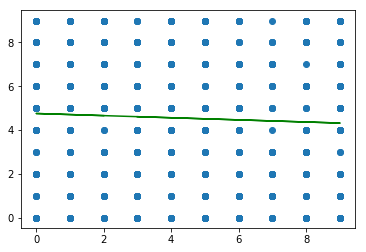

(8.320100139882497, 2.5116186164886503)

In [89]:
lr.fit(train_df)

In [85]:
predictions = lr.predict(test_df[:,0])

In [90]:
lr.error_term(test_df[:,0],test_df[:,1])

(7.996756184063173, 2.4736273364485966)